<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/DUDL_ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from IPython import display

display.set_matplotlib_formats('svg')

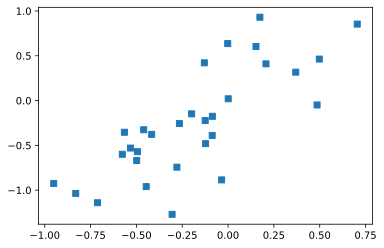

In [21]:
# create data

N = 30
x = torch.randn(N, 1) / 2
y = x + torch.randn(N, 1) / 2

# and plot
plt.plot(x, y, 's')
plt.show()

In [22]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(),      # activation function
    nn.Linear(1,1)  # output layer
    )

ANNreg


Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [23]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descend to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

In [24]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

# Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat, y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

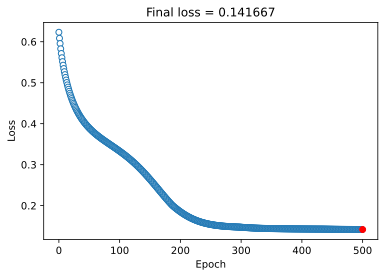

In [25]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [26]:
testloss

tensor(0.1417, grad_fn=<MeanBackward0>)

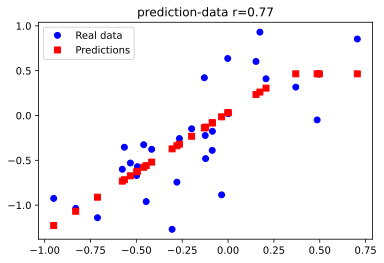

In [27]:
# plot the data
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0, 1]:.2f}')
plt.legend()
plt.show()